### PRAGADEESH M
## 225229126

### Step 1 Download the dataset using this link

https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

### Step 2 Explore the data fields

In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('marketing_campaign.csv',sep=';')
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1794,9905,1952,Graduation,Together,34074.0,1,1,2013-07-13,69,135,...,6,1,0,0,0,0,0,3,11,0
318,113,1951,Graduation,Married,30833.0,1,1,2013-07-16,33,11,...,5,0,0,0,0,0,0,3,11,0
1268,5429,1948,PhD,Married,45579.0,0,1,2013-08-20,10,145,...,6,0,0,0,0,0,0,3,11,0
51,4114,1964,Master,Married,79143.0,0,0,2012-08-11,2,650,...,3,0,0,0,0,0,0,3,11,0
424,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,...,2,0,0,1,0,0,0,3,11,0


In [5]:
df.shape

(2240, 29)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Step 3 Check for missing values and outliers

In [8]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [11]:
df=df.ffill()

In [12]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:>

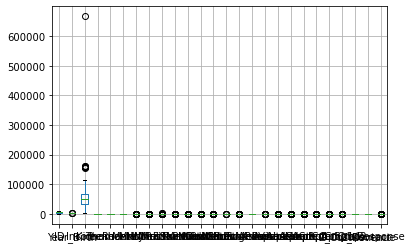

In [13]:
df.boxplot()

### Step 4 Perform EDA

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
education_label = le.fit_transform(df['Education'])
df['Education'] = education_label
marital_staus_label = le.fit_transform(df['Marital_Status'])
df['Marital_Status'] = marital_staus_label

In [17]:
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

In [19]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df['Day'] = df['Dt_Customer'].apply(lambda x: x.day)
df['Month'] = df['Dt_Customer'].apply(lambda x: x.month)
df['Year'] = df['Dt_Customer'].apply(lambda x: x.year)
df.drop(columns='Dt_Customer', inplace=True)

In [20]:
mean_income = round(df.groupby('Education')['Income'].mean(), 2)
df['Income'] = df.apply(lambda row: mean_income[row['Education']] 
                        if np.isnan(row['Income']) 
                        else row['Income'], axis=1)

In [22]:
df['Total_Products'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + \
                         df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [23]:
df['Total_Accepted'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + \
                         df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [25]:
df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + \
                        df['NumCatalogPurchases'] + df['NumStorePurchases']

In [26]:
df['Children'] = df['Kidhome'] + df['Teenhome']
# is the client a parent or not (1 - yes, 0 - no)
df['Parents'] = np.where(df['Children'] > 0, 1, 0)

In [34]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,Complain,Response,Day,Month,Year,Total_Products,Total_Accepted,Total_Purchases,Children,Parents
0,5524,1957,2,4,58138.0,0,0,58,635,88,...,0,1,4,9,2012,1617,0,25,0,0
1,2174,1954,2,4,46344.0,1,1,38,11,1,...,0,0,8,3,2014,27,0,6,2,1
2,4141,1965,2,5,71613.0,0,0,26,426,49,...,0,0,21,8,2013,776,0,21,0,0
3,6182,1984,2,5,26646.0,1,0,26,11,4,...,0,0,10,2,2014,53,0,8,1,1
4,5324,1981,4,3,58293.0,1,0,94,173,43,...,0,0,19,1,2014,422,0,19,1,1


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
income = scaler.fit_transform(df[['Income']])
df['Income'] = income

In [37]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,Complain,Response,Day,Month,Year,Total_Products,Total_Accepted,Total_Purchases,Children,Parents
0,5524,1957,2,4,0.236908,0,0,58,635,88,...,0,1,4,9,2012,1617,0,25,0,0
1,2174,1954,2,4,-0.232510,1,1,38,11,1,...,0,0,8,3,2014,27,0,6,2,1
2,4141,1965,2,5,0.773231,0,0,26,426,49,...,0,0,21,8,2013,776,0,21,0,0
3,6182,1984,2,5,-1.016517,1,0,26,11,4,...,0,0,10,2,2014,53,0,8,1,1
4,5324,1981,4,3,0.243077,1,0,94,173,43,...,0,0,19,1,2014,422,0,19,1,1


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

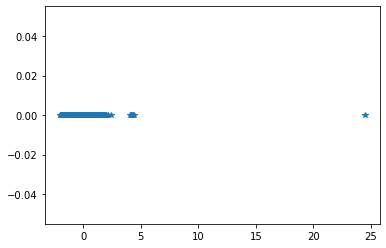

In [40]:
plt.plot(df['Income'],np.zeros_like(df['Income']),'*')

<AxesSubplot:xlabel='Income', ylabel='Recency'>

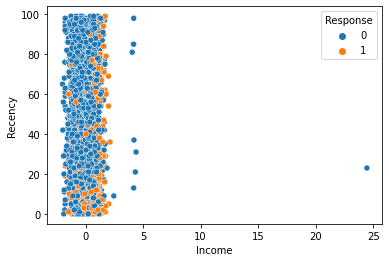

In [42]:
sns.scatterplot(x="Income",y="Recency",data = df, hue='Response')

In [ ]:
sns.pairplot(df[0:4],hue ='Response')
plt.show()

### Step 5 Apply Ml models for classification

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score

In [46]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Response'], axis=1), 
                                                    df['Response'], 
                                                    test_size=0.2, 
                                                    random_state=42)

In [47]:
lor = LogisticRegression()
lor.fit(X_train,y_train)
y_pred=lor.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
accuracy_score(y_pred,y_test)

0.8415178571428571